In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as plticker
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator #What do these do?
from matplotlib import cm
import seaborn as sns
import plotly.express as px
import numpy as np
import sklearn
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


In [2]:
# Plot styling
#os.environ["PATH"] += os.pathsep + '/usr/bin' # To set latex= True?

#plt.style.use('plot_style.txt')
plt.style.use('/data/user/boiger_r/aerosol/aerosol_code1/postprocessing/PLOTS_PAPER/plot_style.txt')

# Textwidth of LaTeX file. Can be determined via \the\textwidth
textwidth = 483.69687

# Decide wether we want to save all figures
save_to_file = True

# Colors
cmap = cm.get_cmap('magma')

# Ticks
loc15 = plticker.MultipleLocator(base=15.0)
loc30 = plticker.MultipleLocator(base=30.0)

In [3]:
def set_size(textwidth, fraction=1, subplots=(1, 1), scale_factor=1, rescale_height=1):
    """Set figure dimensions to avoid scaling in LaTeX.
    
    Based largely on Jack Walton's post on ploting figures with matplotlib and LaTeX:
    https://jwalton.info/Embed-Publication-Matplotlib-Latex/
    
    Input:
        textwidth: float or string
                Document width in points, or string of predined document type
        fraction: float, optional
                Fraction of the width which you wish the figure to occupy
        subplots: array-like, optional
                The number of rows and columns of subplots.
        scale_factor: Facto to scale width and height with
        rescale_height: Factor to rescale height
    Returns:
        fig_dim: tuple
                Dimensions of figure in inches
    """
    if textwidth == 'paper':
        # Textwidth of LaTeX file. Can be determined by typing
        # \the\textwidth
        # in your latex file and then compiling.
        width_pt = 483.69687
    elif textwidth == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = textwidth

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (scale_factor*fig_width_in, rescale_height*scale_factor*fig_height_in)

In [4]:
directory = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/'
directory1 = directory + 'paper_results_gaussian_AAE/version1'
best_model_folder = '79df1_00001' #version1
#best_model_folder = '79df1_00024'
#best_model_folder = '733b8_00013' #version4
pred_datafile = directory1 +'/model/pred.hdf5'

In [5]:
plot_dir = directory1 + '/plots/hyperparameter_scans_paper'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
result_dir = directory1
model_dir = directory1 +'/model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [6]:
color = [cmap(0.8), cmap(0.2)]
color = ['tab:blue', 'tab:red']
#scat_style = {'s': 12, 'marker': 'P', 'alpha': 0.9, 'linewidths': 0.8}

train_marker = {'markerfacecolor': color[0], 'markeredgecolor': color[0], 'color': color[0],
                'markersize': 4, 'alpha': 1}
val_marker = {'markerfacecolor': color[1], 'markeredgecolor': color[1], 'color': color[1],
               'markersize': 3, 'alpha': 1}

In [7]:
test_datafile = '/data/user/boiger_r/aerosol/aerosol_data/raw_data_AAE/pre_log_ts-0.2_wl-450-532-630_sc-None_qoi-ScatteringData/test_dataset.hdf5'

In [8]:
dvar_test = pd.read_hdf(test_datafile,key = 'dvar')
qoi_test = pd.read_hdf(test_datafile,key = 'qoi')
dvar_test.reset_index(drop=True, inplace=True)
qoi_test.reset_index(drop=True, inplace=True)

In [9]:
qoi_columns = qoi_test.columns
dvar_columns = dvar_test.columns

In [10]:
qoi_pred_fw = pd.read_hdf(pred_datafile, 'fw')
qoi_pred_fw = pd.DataFrame(data=qoi_pred_fw, columns=qoi_columns)
qoi_pred_fw

P11_0.450_0  P11_0.450_1  P11_0.450_2  P11_0.450_3  P11_0.450_4  \
0       -14.249567   -14.255645   -14.507500   -14.680056   -15.015520   
1       -15.357966   -15.356447   -15.415657   -15.485341   -15.678013   
2       -13.195445   -13.283733   -13.501621   -14.031829   -14.624123   
3       -14.678004   -14.758633   -14.756907   -14.679797   -14.818027   
4       -14.642250   -14.655123   -14.697591   -14.766610   -14.893620   
...            ...          ...          ...          ...          ...   
19995   -13.519849   -13.548434   -13.733299   -14.010280   -14.366968   
19996   -13.560527   -13.575976   -13.921770   -14.286172   -14.776385   
19997   -15.232517   -15.193444   -15.169997   -15.195757   -15.218714   
19998   -13.774070   -13.742424   -13.913219   -14.135532   -14.380033   
19999   -13.698332   -13.788668   -14.029706   -14.485908   -15.117119   

       P11_0.450_5  P11_0.450_6  P11_0.450_7  P11_0.450_8  P11_0.450_9  ...  \
0       -15.342637   -15.685688   -16.093987   -16.525094   -16.883148  ...   
1       -15.904628   -16.040831   -16.323008   -16.534655   -16.735137  ...   
2       -15.242972   -15.844450   -16.364676   -16.873774   -17.137768  ...   
3       -14.746511   -14.773146   -14.791406   -14.868273   -14.811379  ...   
4       -15.053117   -15.233372   -15.417578   -15.615810   -15.850812  ...   
...            ...          ...          ...          ...          ...  ...   
19995   -14.774587   -15.168340   -15.575054   -16.073190   -16.429304  ...   
19996   -15.314668   -15.771797   -16.377409   -16.879992   -17.263830  ...   
19997   -15.205021   -15.242295   -15.229568   -15.386026   -15.382027  ...   
19998   -14.796613   -15.134599   -15.505851   -15.997019   -16.435669  ...   
19999   -15.681932   -16.262524   -16.849112   -17.331401   -17.823221  ...   

       P12_0.630_170  P12_0.630_171  P12_0.630_172  P12_0.630_173  \
0           0.008986       0.011796       0.023692       0.036562   
1           0.042301       0.035069       0.028339       0.015232   
2           0.010437       0.004794       0.008039       0.004423   
3          -0.012767      -0.011663      -0.005551       0.000130   
4          -0.230912      -0.204451      -0.153701      -0.110141   
...              ...            ...            ...            ...   
19995      -0.024592      -0.022325      -0.009004       0.024768   
19996       0.143587       0.110756       0.064874       0.024993   
19997      -0.120669      -0.098706      -0.079408      -0.062355   
19998      -0.262008      -0.268360      -0.273706      -0.258950   
19999      -0.008813      -0.004705       0.007044       0.017284   

       P12_0.630_174  P12_0.630_175  P12_0.630_176  P12_0.630_177  \
0           0.064321       0.072613       0.060981       0.040825   
1           0.017570       0.011389       0.010737       0.003372   
2           0.010559       0.007463       0.003394       0.000077   
3           0.002383       0.000197      -0.003553      -0.003930   
4          -0.082052      -0.053195      -0.033481      -0.018488   
...              ...            ...            ...            ...   
19995       0.060951       0.079190       0.080321       0.056089   
19996      -0.014172      -0.041965      -0.042386      -0.033147   
19997      -0.047149      -0.034015      -0.024070      -0.014213   
19998      -0.225730      -0.179923      -0.130186      -0.077070   
19999       0.023250       0.028227       0.028139       0.019542   

       P12_0.630_178  P12_0.630_179  
0           0.021078       0.005287  
1           0.002881       0.000893  
2           0.000123       0.000084  
3          -0.002103       0.000098  
4          -0.007938      -0.002281  
...              ...            ...  
19995       0.027868       0.007107  
19996      -0.013575      -0.002320  
19997      -0.007083      -0.001714  
19998      -0.034912      -0.008354  
19999       0.010176       0.002549  

[20000 rows x 1077 columns]

In [11]:
dvar_pred_iv = pd.read_hdf(pred_datafile,'inv')
dvar_pred_iv = pd.DataFrame(data=dvar_pred_iv, columns=dvar_columns)
dvar_pred_iv

V_tot  R_median       GSD         n     k_532       AAE
0      2325.413768  1.357443  1.421760  1.346221  0.060342  5.812247
1      1135.245885  0.863170  1.414260  1.559604  0.172946  1.021645
2      4991.611820  2.031067  1.404978  1.556748  0.178853  1.164190
3      4960.556016  0.253449  1.402615  1.331327  0.037079  4.435317
4      2553.766474  0.804352  1.439940  1.436156  0.119266  3.176575
...            ...       ...       ...       ...       ...       ...
19995  4772.554564  1.486830  1.413734  1.334562  0.048354  4.664656
19996  3513.545010  1.834870  1.404642  1.468014  0.011932  5.816171
19997  2072.540701  0.382844  1.431329  1.389230  0.042805  3.206604
19998  4027.345042  1.369324  1.407162  1.562527  0.013319  4.527068
19999  3139.319569  2.065954  1.426161  1.336717  0.099202  1.237793

[20000 rows x 6 columns]

In [12]:
wl = ['450', '532','630']
wl_P11_450 = []
wl_P11_532 = []
wl_P11_630 = []
wl_P12_450 = []
wl_P12_532 = []
wl_P12_630 = []
for key in qoi_columns:
    if 'P11_0.450' in key:
        wl_P11_450.append(key)
    elif 'P11_0.532' in key:
        wl_P11_532.append(key)
    elif 'P11_0.630' in key:
        wl_P11_630.append(key)
    elif 'P12_0.450' in key:
        wl_P12_450.append(key)
    elif 'P12_0.532' in key:
        wl_P12_532.append(key)
    elif 'P12_0.630' in key:
        wl_P12_630.append(key)
        

In [13]:
wl_list_P11 = [wl_P11_450,wl_P11_532,wl_P11_630]
wl_list_P12 = [wl_P12_450, wl_P12_532, wl_P12_630]

In [14]:
color1 = ['orange','red','darkred','dodgerblue','blue','midnightblue']

In [15]:
pred_marker450 = {'marker':'.','markersize':6,'markerfacecolor': color1[0], 'markeredgecolor': color1[0], 'color': color1[0],
             'alpha': 0.9}
test_marker450 = {'linewidth':5,'color': color1[3],'alpha': 0.9}
pred_marker532 = {'marker':'.','markersize':6,'markerfacecolor': color1[1], 'markeredgecolor': color1[1], 'color': color1[1],
             'alpha': 0.9}
test_marker532 = {'linewidth':5,'color': color1[4], 'alpha': 0.9}
pred_marker630 = {'marker':'.','markersize':6,'markerfacecolor': color1[2], 'markeredgecolor': color1[2], 'color': color1[2],
             'alpha': 0.9}
test_marker630 = {'linewidth':5,'color': color1[5], 'alpha': 0.9}

In [16]:

presentation_plot_index = [4000,1000,6000,3000,2000,5000]

In [17]:
dvar_pred_iv['k_450']=dvar_pred_iv['k_532']*(450/532)**(1-dvar_pred_iv['AAE'])
dvar_pred_iv['k_630']=dvar_pred_iv['k_532']*(630/532)**(1-dvar_pred_iv['AAE'])
dvar_test['k_450']=dvar_test['k_532']*(450/532)**(1-dvar_test['AAE'])
dvar_test['k_630']=dvar_test['k_532']*(630/532)**(1-dvar_test['AAE'])

In [18]:
x_450 = 450*np.ones(len(presentation_plot_index))
x_532 = 532*np.ones(len(presentation_plot_index))
x_630 = 630*np.ones(len(presentation_plot_index))


In [19]:
color1 = ['gold','orange','orangered','red','firebrick','darkred']

color2 = ['skyblue','dodgerblue','royalblue', 'blue', 'darkblue','midnightblue']
color1 = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red','tab:purple', 'tab:cyan']
colorg = 'tab:gray'

In [21]:
fontsize1 = 20

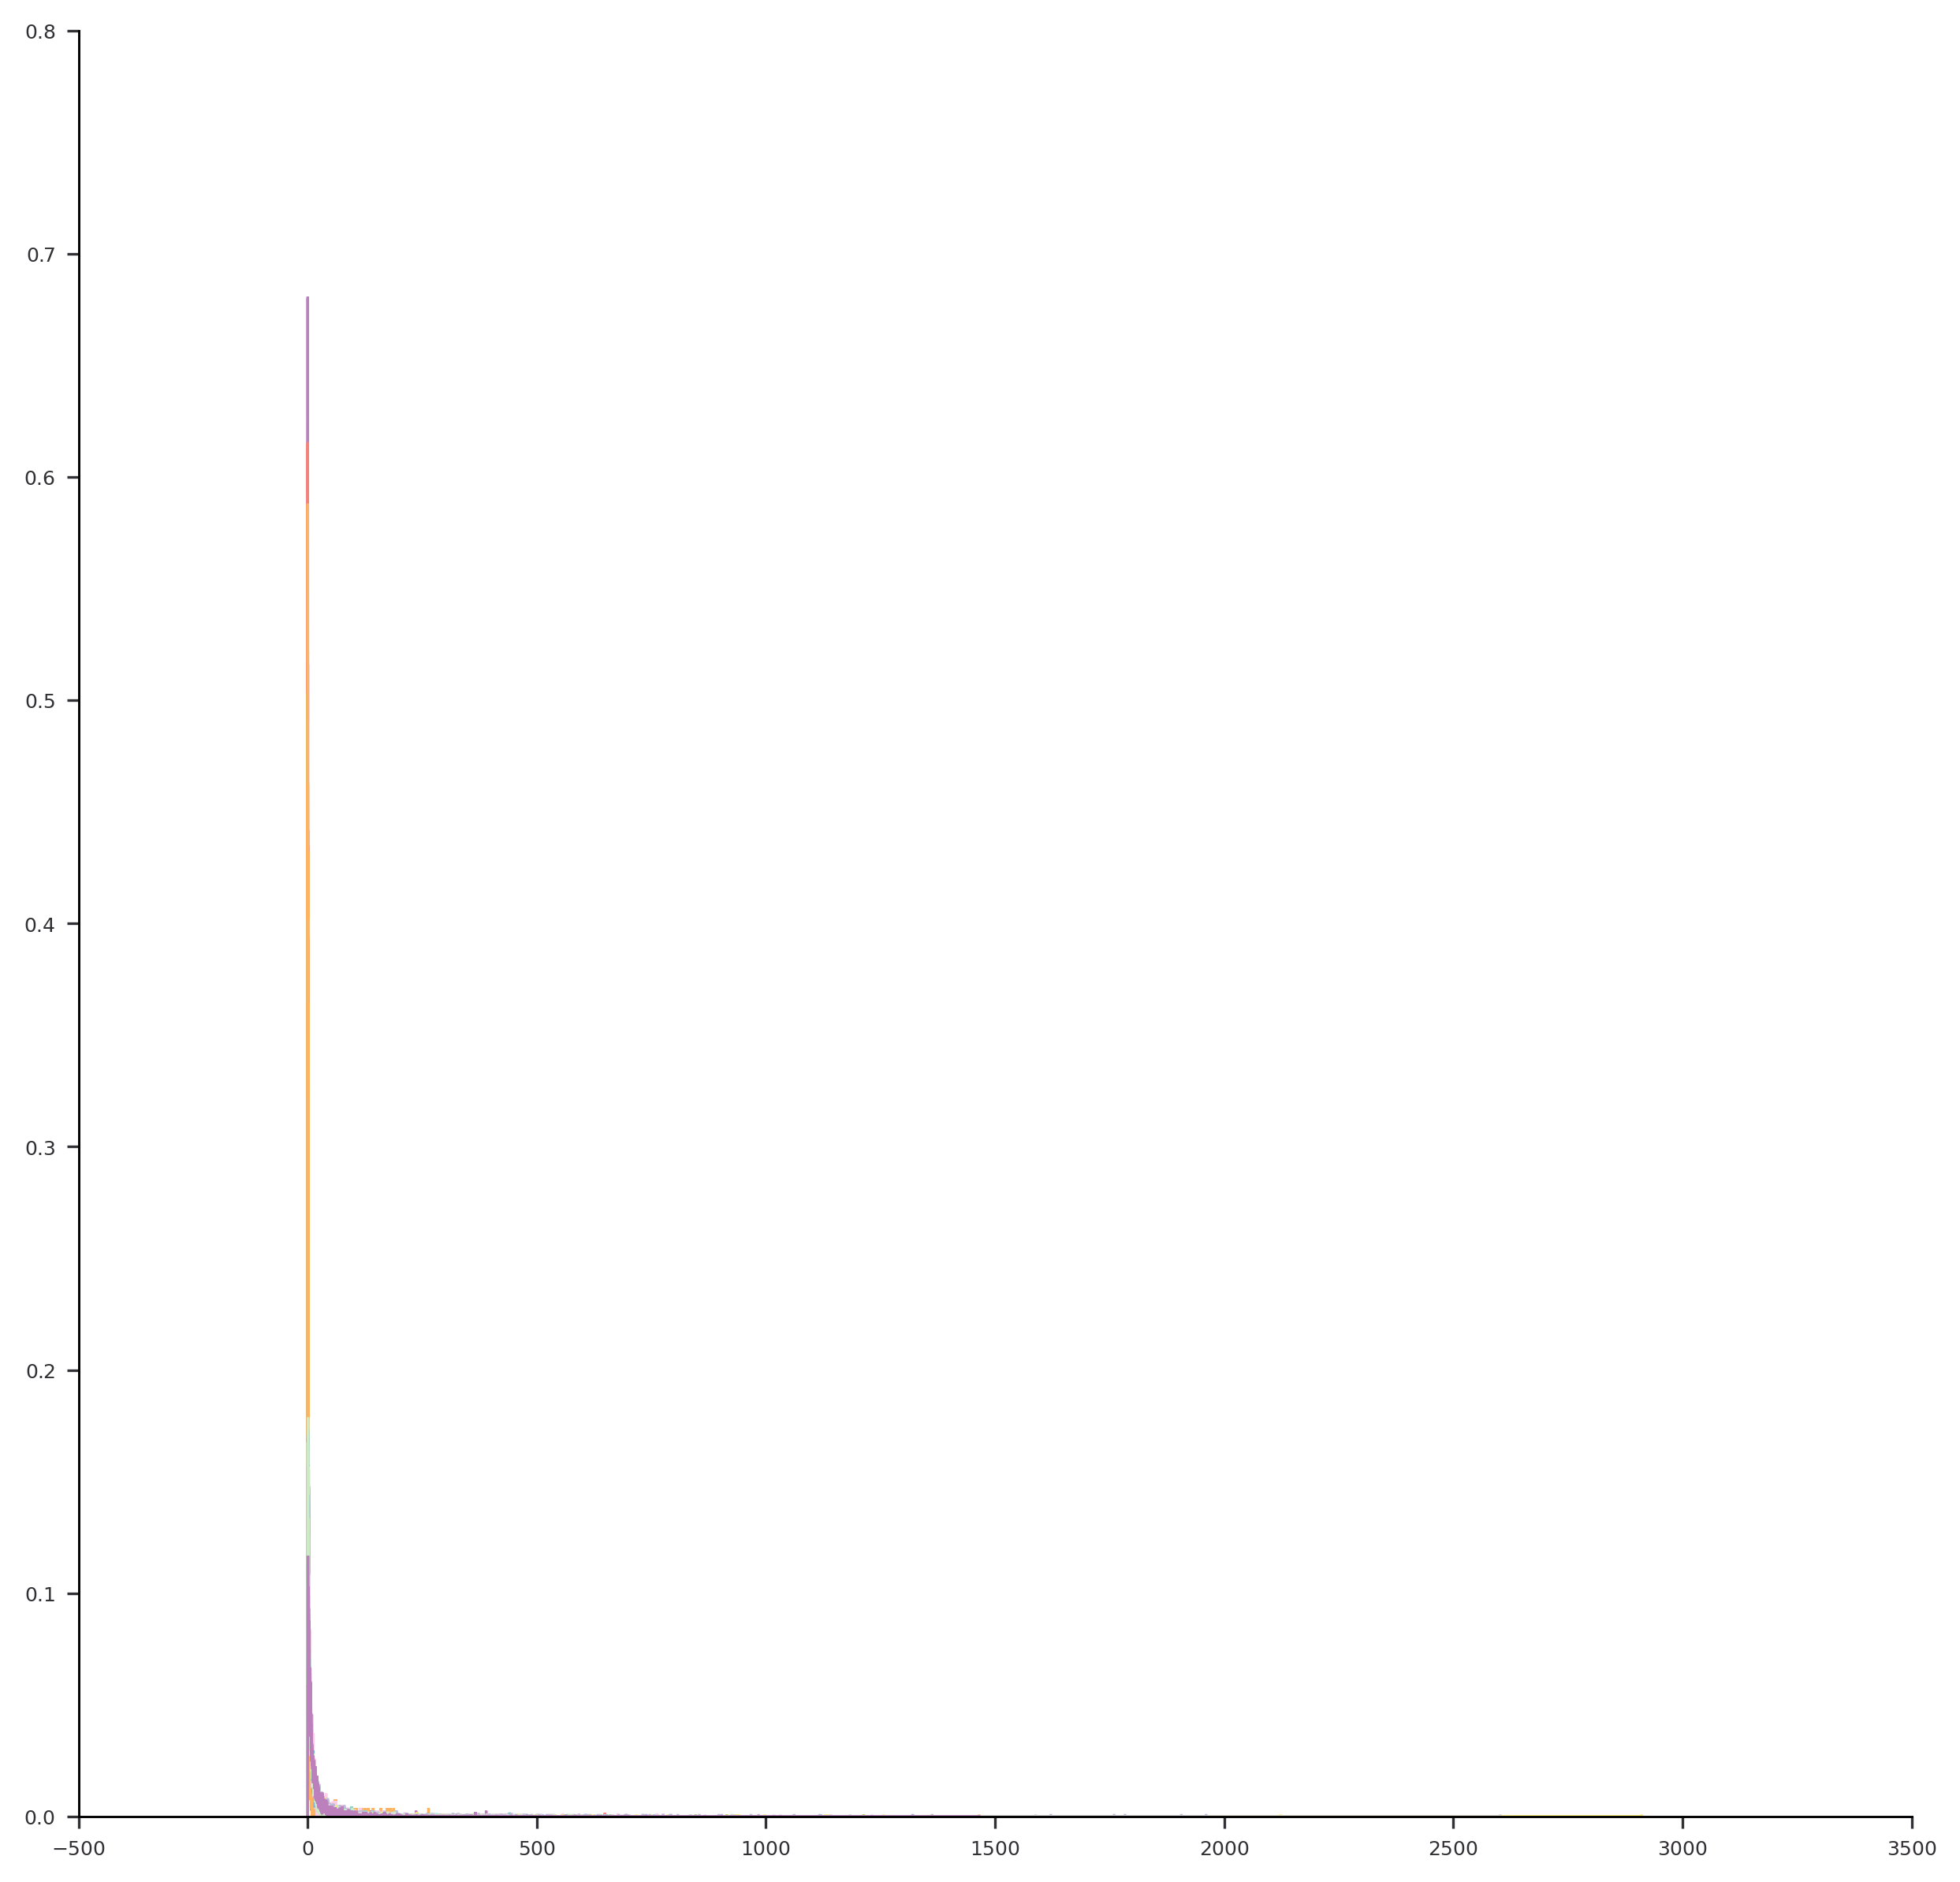

In [22]:
fig, ax = plt.subplots(figsize = (10,10))

x1data = []
x2data = []
y1data = []
y2data = []

for datapoint in presentation_plot_index:
    mu1 = dvar_pred_iv.iloc[datapoint]['R_median']
    sigma1 = dvar_pred_iv.iloc[datapoint]['GSD']
    mu2 = dvar_test.iloc[datapoint]['R_median']
    sigma2 = dvar_test.iloc[datapoint]['GSD']
    Vtot1 = dvar_pred_iv.iloc[datapoint]['V_tot']
    Vtot2 = dvar_test.iloc[datapoint]['V_tot']
    
    
    s1 = np.random.lognormal(mu1, sigma1, 10000)
    s2 = np.random.lognormal(mu2, sigma2, 10000)


    count1, bins1, ignored1 = plt.hist(s1, 10000, density=True, align='mid',histtype = 'step')
    count2, bins2, ignored2 = plt.hist(s2, 10000, density=True, align='mid',histtype = 'step')

    x1 = np.linspace(min(bins1), max(bins1), 100000)
    x2 = np.linspace(min(bins2), max(bins2), 100000)

    pdf1 = Vtot1*(np.exp(-(np.log(x1) - np.log(mu1))**2 / (2 * sigma1**2)) / (x1 * sigma1 * np.sqrt(2 * np.pi)))
    pdf2 = Vtot2*(np.exp(-(np.log(x2) - np.log(mu2))**2 / (2 * sigma2**2)) / (x2 * sigma2 * np.sqrt(2 * np.pi)))

    x1data.append(x1)
    x2data.append(x2)
    y1data.append(pdf1)
    y2data.append(pdf2)


In [23]:
for i in range(len(presentation_plot_index)):
    print(i)

0
1
2
3
4
5


0
1
2
3
4
5


[Text(450, 0, '450'), Text(532, 0, '532'), Text(630, 0, '630')]

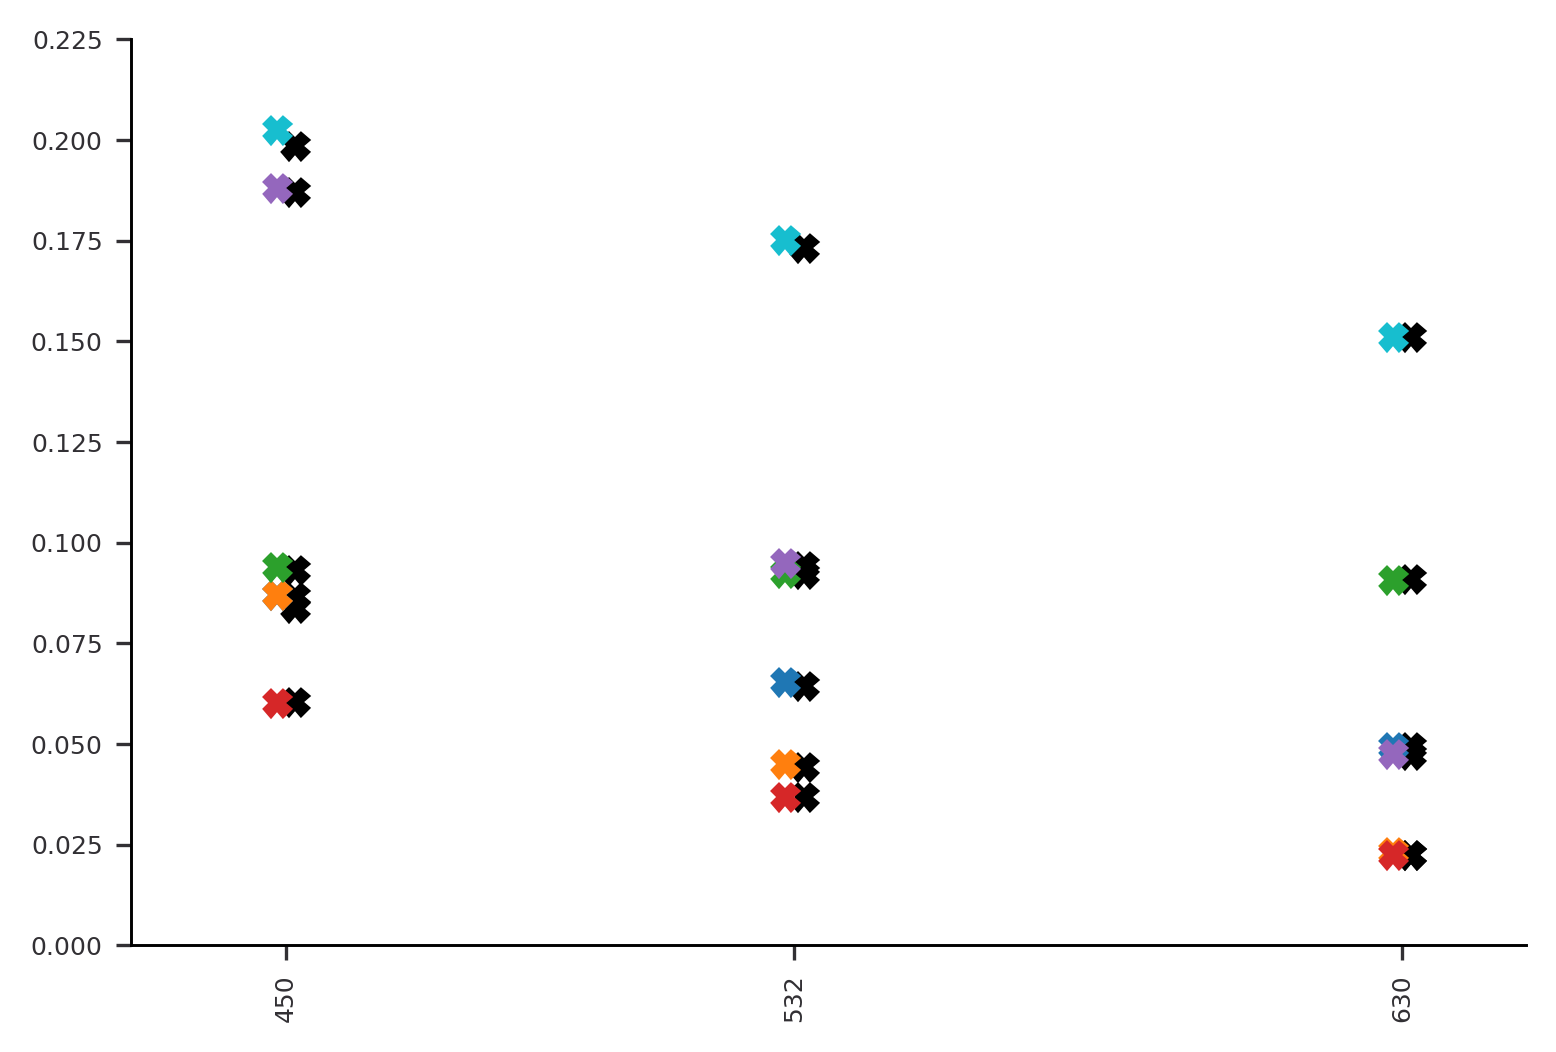

In [24]:
fig,ax = plt.subplots()
plt.plot(x_450+1.5,dvar_test['k_450'].iloc[presentation_plot_index],'kX')
plt.plot(x_532+1.5,dvar_test['k_532'].iloc[presentation_plot_index],'kX')
#plt.plot(x_532+1.5,dvar_test['n'].iloc[presentation_plot_index],'k8')
plt.plot(x_630+1.5,dvar_test['k_630'].iloc[presentation_plot_index],'kX')


for i in range(len(presentation_plot_index)):
    print(i)
    plt.plot(x_450[i]-1.5,dvar_pred_iv['k_450'].iloc[presentation_plot_index[i]],'X',color = color1[i], markeredgecolor = color1[i])
    plt.plot(x_532[i]-1.5,dvar_pred_iv['k_532'].iloc[presentation_plot_index[i]],'X',color = color1[i], markeredgecolor = color1[i])
#    plt.plot(x_532[i]-1.5,dvar_pred_iv['n'].iloc[presentation_plot_index[i]],'o',color = color1[i], markeredgecolor = color1[i])
    plt.plot(x_630[i]-1.5,dvar_pred_iv['k_630'].iloc[presentation_plot_index[i]],'X',color = color1[i], markeredgecolor = color1[i])



xlabel = [450,532,630]
x_pos = xlabel
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, rotation='vertical')


In [ ]:
fig,ax = plt.subplots()
plt.plot(x_450+1.5,dvar_test['k_450'].iloc[presentation_plot_index],'kX')
plt.plot(x_532+1.5,dvar_test['k_532'].iloc[presentation_plot_index],'kX')
#plt.plot(x_532+1.5,dvar_test['n'].iloc[presentation_plot_index],'k8')
plt.plot(x_630+1.5,dvar_test['k_630'].iloc[presentation_plot_index],'kX')


for i in range(len(presentation_plot_index)):
    print(i)
    plt.plot(x_450[i]-1.5,dvar_pred_iv['k_450'].iloc[presentation_plot_index[i]],'X',color = color1[i], markeredgecolor = color1[i])
    plt.plot(x_532[i]-1.5,dvar_pred_iv['k_532'].iloc[presentation_plot_index[i]],'X',color = color1[i], markeredgecolor = color1[i])
#    plt.plot(x_532[i]-1.5,dvar_pred_iv['n'].iloc[presentation_plot_index[i]],'o',color = color1[i], markeredgecolor = color1[i])
    plt.plot(x_630[i]-1.5,dvar_pred_iv['k_630'].iloc[presentation_plot_index[i]],'X',color = color1[i], markeredgecolor = color1[i])



xlabel = [450,532,630]
x_pos = xlabel
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, rotation='vertical')

In [25]:
dvar_columns

Index(['V_tot', 'R_median', 'GSD', 'n', 'k_532', 'AAE'], dtype='object')

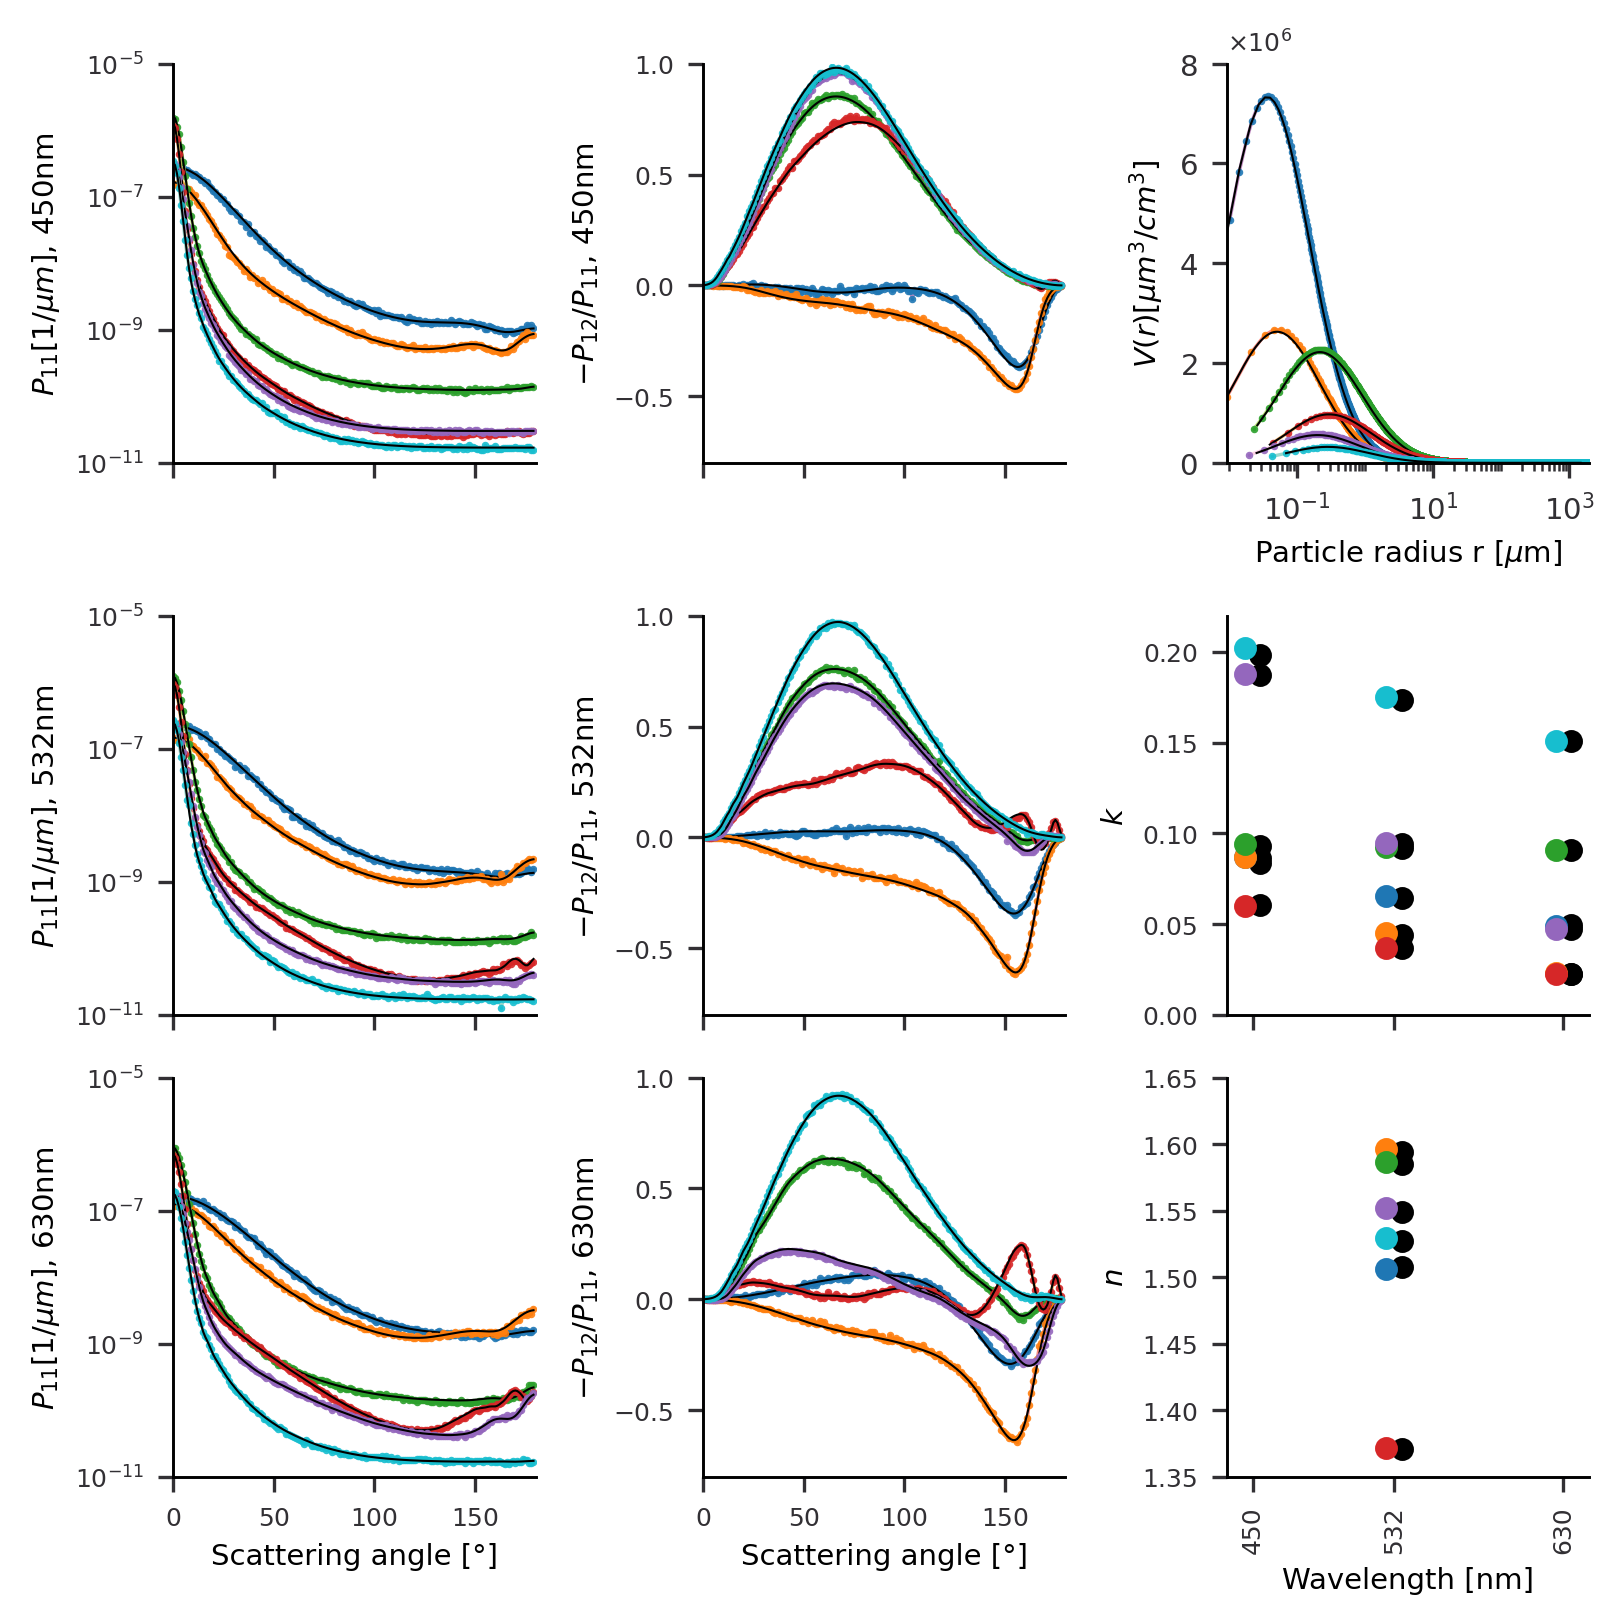

In [26]:
#fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(3, 3, figsize =(14,14))
#fig,ax = plt.subplots(3, 3, figsize =(14,14))

fig = plt.figure(figsize=(5.3,5.3),constrained_layout=True)


gs = GridSpec(3, 3, figure=fig)

#ax1 = fig.add_subplot(gs[0, 0])

ax2 = fig.add_subplot(gs[0, 0])
#ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 1])
#ax5 = fig.add_subplot(gs[1, 0],sharex=ax1)
ax6 = fig.add_subplot(gs[1, 0],sharex=ax2)
#ax7 = fig.add_subplot(gs[1, ],sharex=ax3)
ax8 = fig.add_subplot(gs[1, 1],sharex=ax4)
#ax9 = fig.add_subplot(gs[2, 0],sharex=ax1)
ax10 = fig.add_subplot(gs[2, 0],sharex=ax2)
#ax11 = fig.add_subplot(gs[2, 2],sharex=ax3)
ax12 = fig.add_subplot(gs[2, 1],sharex=ax4)
ax13 = fig.add_subplot(gs[0,2])
ax14 = fig.add_subplot(gs[1,2])
ax15 = fig.add_subplot(gs[2,2],sharex=ax14)
i = 0
for index in presentation_plot_index:
    
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_450])).iloc[index],**pred_marker532)
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_test[wl_P11_450])).iloc[index],**test_marker532)

    
    
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_532])).iloc[index],**pred_marker532)
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_test[wl_P11_532])).iloc[index],**test_marker532)

    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_630])).iloc[index],**pred_marker532)
    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_test[wl_P11_630])).iloc[index],**test_marker532)

    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_pred_fw[wl_P12_450])).iloc[index],**pred_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_test[wl_P12_450])).iloc[index],**test_marker532)
      
    
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_pred_fw[wl_P12_532])).iloc[index],**pred_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_test[wl_P12_532])).iloc[index],**test_marker532)

    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_pred_fw[wl_P12_630])).iloc[index],**pred_marker532)
    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_test[wl_P12_630])).iloc[index],**test_marker532)


    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax6.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax8.get_xticklabels(), visible=False)
    i = i+1

ax2.set_ylabel('$P_{11} [1 / \mu m]$, 450nm')
ax2.set_yscale('log')
ax2.set_xlim(0, 180)
ax6.set_yscale('log')
ax6.set_ylabel('$P_{11} [1 / \mu m]$, 532nm')
ax6.set_xlim(0, 180)
ax10.set_yscale('log')
ax10.set_xlabel('Scattering angle [°]')
ax10.set_ylabel('$P_{11} [1 / \mu m]$, 630nm')
ax10.set_xlim(0, 180)
ax4.set_xlim(0, 180)
ax4.set_ylabel('$-P_{12}/P_{11}$, 450nm')
ax8.set_ylabel('$-P_{12}/P_{11}$, 532nm ')
ax8.set_xlim(0, 180)
ax12.set_xlabel('Scattering angle [°]')
ax12.set_ylabel('$-P_{12}/P_{11}$, 630nm')
ax12.set_xlim(0, 180)    



ax2.set_ylim(bottom = 10**(-11))
ax6.set_ylim(bottom = 10**(-11))
ax10.set_ylim(bottom = 10**(-11))

ax4.set_ylim(-0.8,1)
ax8.set_ylim(-0.8,1)
ax12.set_ylim(-0.8,1)



i=0
for datalen in (0,1,2,3,4,5):
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax13.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532)
    ax13.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532)

    i=i+1
    ax13.set_xscale('log')
    ax13.set_xlabel('Particle radius r [$\mu$m]',fontsize = 7)
    ax13.set_ylabel('$V(r) [\mu m^3/cm^3] $' ,fontsize = 7)
    ax13.tick_params(labelsize = 7)    
    #ax13.xaxis.set_minor_locator(AutoMinorLocator())
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    ax13.xaxis.set_minor_locator(x_minor)
    ax13.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ax13.set_ylim(bottom=0)
    ax13.set_xlim(left = np.min(x1data), right = np.max(x2data))
    
    
df_new = dvar_test.iloc[presentation_plot_index].round(2)
df_new_columns = ["$V_{tot}$","$R_{mean}$","$\sigma_g$","$n$","$k_{532}$","AAE"]
df_new_index = ['1000','2000','3000','4000','5000','6000']

ax14.plot(x_450+4.5,dvar_test['k_450'].iloc[presentation_plot_index],'ko', markersize = 4.5)
ax14.plot(x_532+4.5,dvar_test['k_532'].iloc[presentation_plot_index],'ko', markersize = 4.5)
ax14.plot(x_630+4.5,dvar_test['k_630'].iloc[presentation_plot_index],'ko', markersize = 4.5)

ax15.plot(x_532+4.5,dvar_test['n'].iloc[presentation_plot_index],'ko', markersize = 4.5)

for i in range(len(presentation_plot_index)):
    ax14.plot(x_450[i]-4.5,dvar_pred_iv['k_450'].iloc[presentation_plot_index[i]],'o',color = color1[i], markeredgecolor = color1[i], markersize =4.5)
    ax14.plot(x_532[i]-4.5,dvar_pred_iv['k_532'].iloc[presentation_plot_index[i]],'o',color = color1[i], markeredgecolor = color1[i], markersize = 4.5)
    ax14.plot(x_630[i]-4.5,dvar_pred_iv['k_630'].iloc[presentation_plot_index[i]],'o',color = color1[i], markeredgecolor = color1[i], markersize = 4.5)
    ax15.plot(x_532[i]-4.5,dvar_pred_iv['n'].iloc[presentation_plot_index[i]],'o',color = color1[i], markeredgecolor = color1[i], markersize = 4.5)





xlabel = [450,532,630]
ax15.set_xticks(xlabel)
ax15.set_xticklabels(xlabel, rotation='vertical')
ax14.set_xticks(xlabel)

plt.setp(ax14.get_xticklabels(), visible=False)

ax15.set_xlabel('Wavelength [nm]')
ax14.set_ylabel('$k$')
ax15.set_ylabel('$n$')
ax14.set_xlim(435,645)
ax15.set_xlim(435,645)

ax14.set_ylim(top = 0.22)

#fig.tight_layout() 
fig.savefig(f'{plot_dir}/Test_Pred_V_refrac.jpg',bbox_inches='tight')

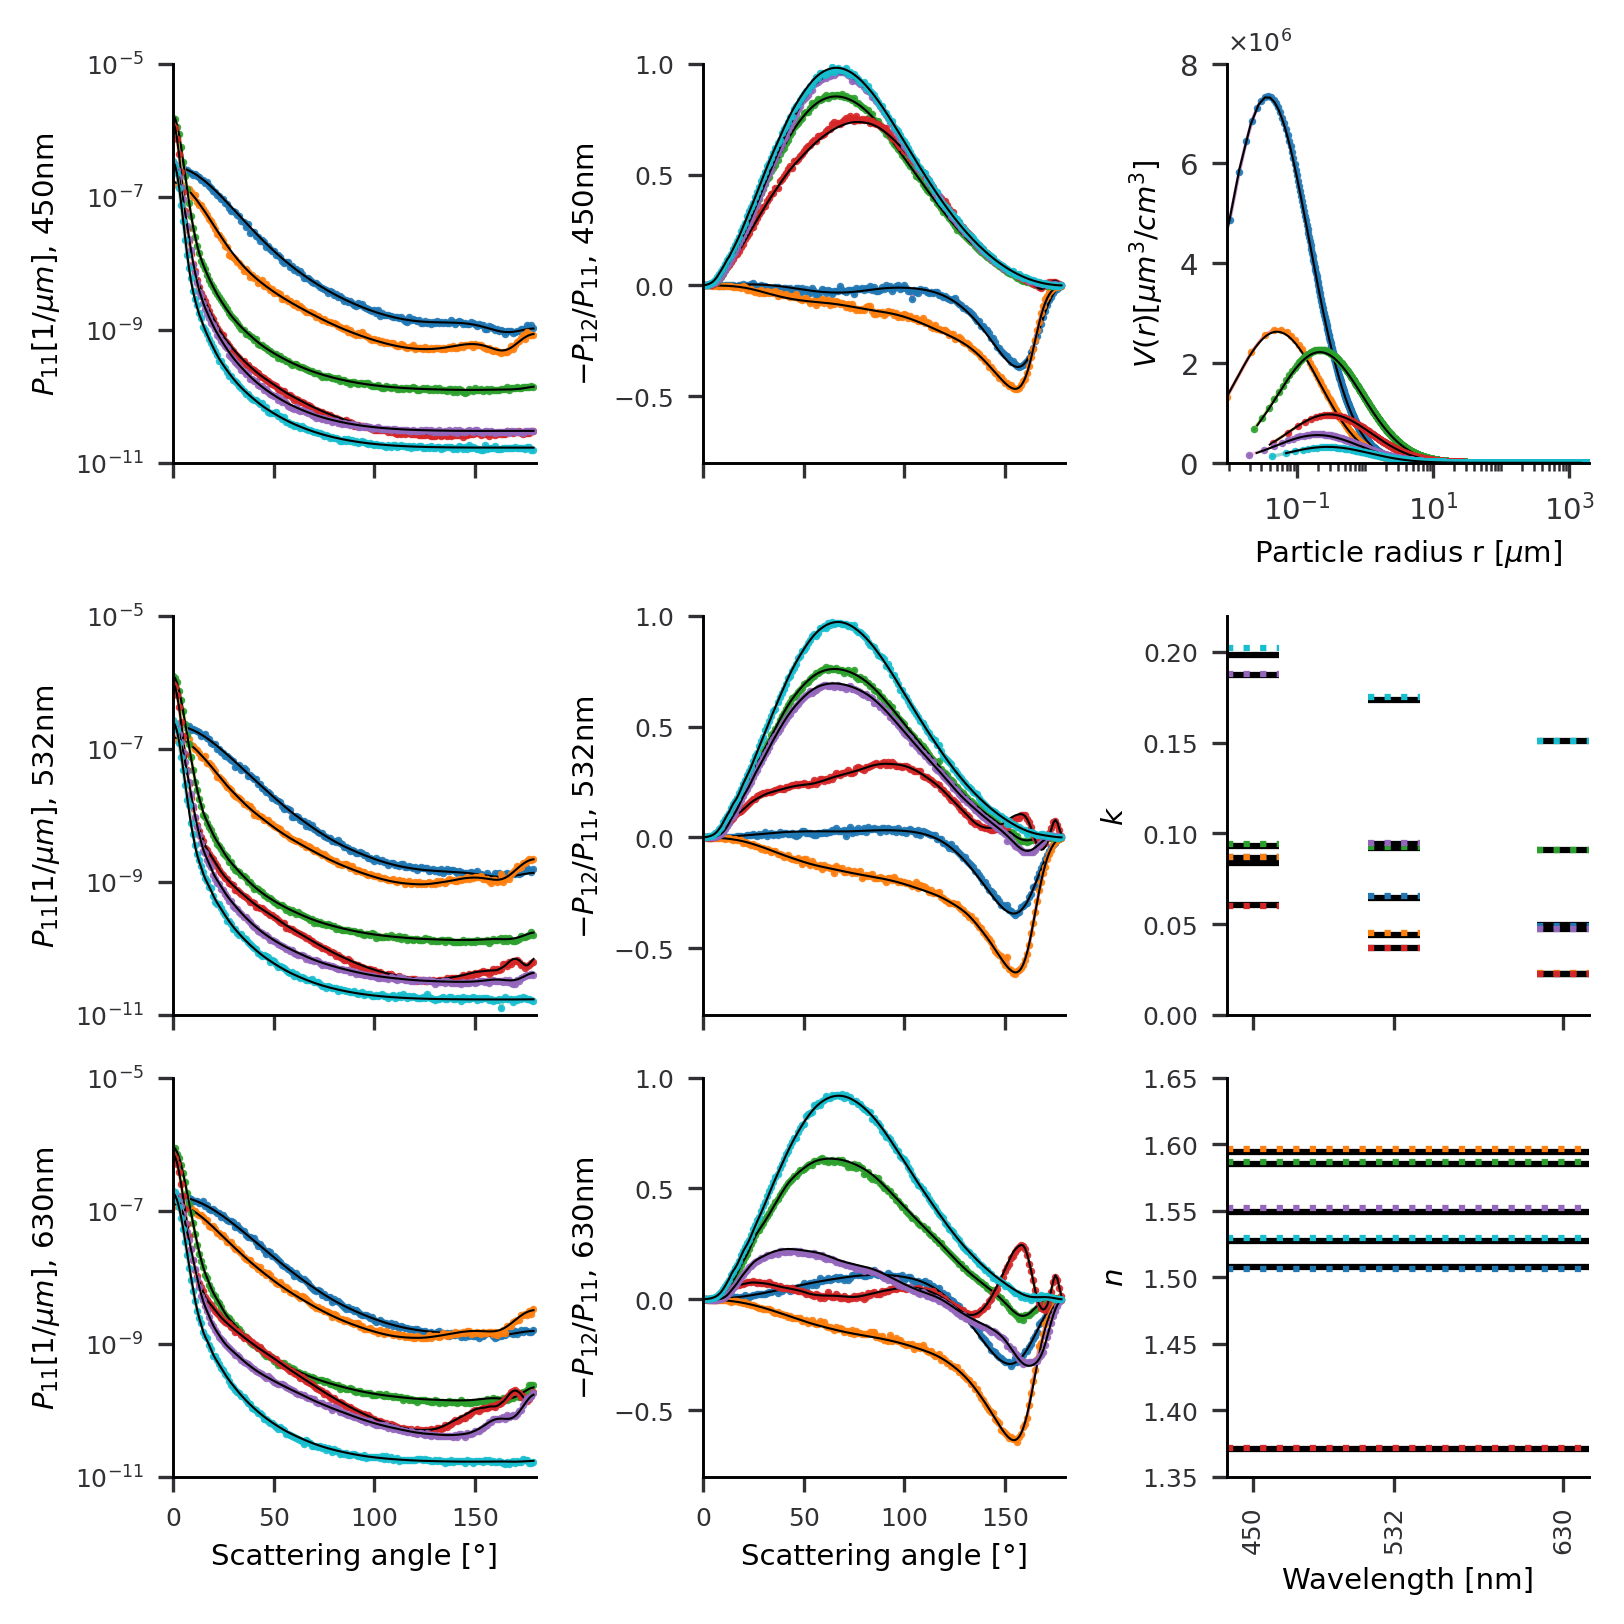

In [75]:
#fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(3, 3, figsize =(14,14))
#fig,ax = plt.subplots(3, 3, figsize =(14,14))

fig = plt.figure(figsize=(5.3,5.3),constrained_layout=True)


gs = GridSpec(3, 3, figure=fig)

#ax1 = fig.add_subplot(gs[0, 0])

ax2 = fig.add_subplot(gs[0, 0])
#ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 1])
#ax5 = fig.add_subplot(gs[1, 0],sharex=ax1)
ax6 = fig.add_subplot(gs[1, 0],sharex=ax2)
#ax7 = fig.add_subplot(gs[1, ],sharex=ax3)
ax8 = fig.add_subplot(gs[1, 1],sharex=ax4)
#ax9 = fig.add_subplot(gs[2, 0],sharex=ax1)
ax10 = fig.add_subplot(gs[2, 0],sharex=ax2)
#ax11 = fig.add_subplot(gs[2, 2],sharex=ax3)
ax12 = fig.add_subplot(gs[2, 1],sharex=ax4)
ax13 = fig.add_subplot(gs[0,2])
ax14 = fig.add_subplot(gs[1,2])
ax15 = fig.add_subplot(gs[2,2],sharex=ax14)
i = 0
for index in presentation_plot_index:
    
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_450])).iloc[index],**pred_marker532)
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_test[wl_P11_450])).iloc[index],**test_marker532)

    
    
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_532])).iloc[index],**pred_marker532)
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_test[wl_P11_532])).iloc[index],**test_marker532)

    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_630])).iloc[index],**pred_marker532)
    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_test[wl_P11_630])).iloc[index],**test_marker532)

    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_pred_fw[wl_P12_450])).iloc[index],**pred_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_test[wl_P12_450])).iloc[index],**test_marker532)
      
    
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_pred_fw[wl_P12_532])).iloc[index],**pred_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_test[wl_P12_532])).iloc[index],**test_marker532)

    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_pred_fw[wl_P12_630])).iloc[index],**pred_marker532)
    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_test[wl_P12_630])).iloc[index],**test_marker532)


    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax6.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax8.get_xticklabels(), visible=False)
    i = i+1

ax2.set_ylabel('$P_{11} [1 / \mu m]$, 450nm')
ax2.set_yscale('log')
ax2.set_xlim(0, 180)
ax6.set_yscale('log')
ax6.set_ylabel('$P_{11} [1 / \mu m]$, 532nm')
ax6.set_xlim(0, 180)
ax10.set_yscale('log')
ax10.set_xlabel('Scattering angle [°]')
ax10.set_ylabel('$P_{11} [1 / \mu m]$, 630nm')
ax10.set_xlim(0, 180)
ax4.set_xlim(0, 180)
ax4.set_ylabel('$-P_{12}/P_{11}$, 450nm')
ax8.set_ylabel('$-P_{12}/P_{11}$, 532nm ')
ax8.set_xlim(0, 180)
ax12.set_xlabel('Scattering angle [°]')
ax12.set_ylabel('$-P_{12}/P_{11}$, 630nm')
ax12.set_xlim(0, 180)    



ax2.set_ylim(bottom = 10**(-11))
ax6.set_ylim(bottom = 10**(-11))
ax10.set_ylim(bottom = 10**(-11))

ax4.set_ylim(-0.8,1)
ax8.set_ylim(-0.8,1)
ax12.set_ylim(-0.8,1)



i=0
for datalen in (0,1,2,3,4,5):
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax13.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532)
    ax13.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532)

    i=i+1
    ax13.set_xscale('log')
    ax13.set_xlabel('Particle radius r [$\mu$m]',fontsize = 7)
    ax13.set_ylabel('$V(r) [\mu m^3/cm^3] $' ,fontsize = 7)
    ax13.tick_params(labelsize = 7)    
    #ax13.xaxis.set_minor_locator(AutoMinorLocator())
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    ax13.xaxis.set_minor_locator(x_minor)
    ax13.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ax13.set_ylim(bottom=0)
    ax13.set_xlim(left = np.min(x1data), right = np.max(x2data))
    
    
df_new = dvar_test.iloc[presentation_plot_index].round(2)
df_new_columns = ["$V_{tot}$","$R_{mean}$","$\sigma_g$","$n$","$k_{532}$","AAE"]
df_new_index = ['1000','2000','3000','4000','5000','6000']

#ax14.plot(x_450+4.5,dvar_test['k_450'].iloc[presentation_plot_index],'k', markersize = 4.5)
#ax14.plot(x_532+4.5,dvar_test['k_532'].iloc[presentation_plot_index],'k', markersize = 4.5)
#ax14.plot(x_630+4.5,dvar_test['k_630'].iloc[presentation_plot_index],'k', markersize = 4.5)

#ax15.plot(x_532+4.5,dvar_test['n'].iloc[presentation_plot_index],'k', markersize = 4.5)
ax15.hlines(dvar_test['n'].iloc[presentation_plot_index], 435, 645, colors='k', linestyles='solid',linewidth = 1.5)

ax14.hlines(dvar_test['k_450'].iloc[presentation_plot_index], 435, 465, colors='k', linestyles='solid',linewidth = 1.5)
ax14.hlines(dvar_test['k_532'].iloc[presentation_plot_index], 517, 547, colors='k', linestyles='solid',linewidth = 1.5)
ax14.hlines(dvar_test['k_630'].iloc[presentation_plot_index], 615, 645, colors='k', linestyles='solid',linewidth = 1.5)


for i in range(len(presentation_plot_index)):
    #ax14.plot(x_450[i]-4.5,dvar_pred_iv['k_450'].iloc[presentation_plot_index[i]],'-',color = color1[i], markeredgecolor = color1[i], markersize =4.5)
    #ax14.plot(x_532[i]-4.5,dvar_pred_iv['k_532'].iloc[presentation_plot_index[i]],'-',color = color1[i], markeredgecolor = color1[i], markersize = 4.5)
    #ax14.plot(x_630[i]-4.5,dvar_pred_iv['k_630'].iloc[presentation_plot_index[i]],'-',color = color1[i], markeredgecolor = color1[i], markersize = 4.5)
    #ax15.plot(x_532[i]-4.5,dvar_pred_iv['n'].iloc[presentation_plot_index[i]],'',color = color1[i], markeredgecolor = color1[i], markersize = 4.5)


    ax15.hlines(dvar_pred_iv['n'].iloc[presentation_plot_index[i]], 435, 645, colors=color1[i], linestyles='dotted', linewidth = 1.5)
    ax14.hlines(dvar_pred_iv['k_450'].iloc[presentation_plot_index[i]], 435, 465, colors=color1[i], linestyles='dotted', linewidth = 1.5)
    ax14.hlines(dvar_pred_iv['k_532'].iloc[presentation_plot_index[i]], 517, 547, colors=color1[i], linestyles='dotted', linewidth = 1.5)
    ax14.hlines(dvar_pred_iv['k_630'].iloc[presentation_plot_index[i]], 615, 645, colors=color1[i], linestyles='dotted', linewidth = 1.5)


xlabel = [450,532,630]
ax15.set_xticks(xlabel)
ax15.set_xticklabels(xlabel, rotation='vertical')
ax14.set_xticks(xlabel)

plt.setp(ax14.get_xticklabels(), visible=False)

ax15.set_xlabel('Wavelength [nm]')
ax14.set_ylabel('$k$')
ax15.set_ylabel('$n$')
ax14.set_xlim(435,645)
ax15.set_xlim(435,645)

ax14.set_ylim(top = 0.22)

#fig.tight_layout() 
fig.savefig(f'{plot_dir}/Test_Pred_V_refrac.jpg',bbox_inches='tight')

In [ ]:
#fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(3, 3, figsize =(14,14))
#fig,ax = plt.subplots(3, 3, figsize =(14,14))

fig = plt.figure(figsize=(5.3,5.3),constrained_layout=True)


gs = GridSpec(3, 3, figure=fig)

#ax1 = fig.add_subplot(gs[0, 0])

ax2 = fig.add_subplot(gs[0, 0])
#ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 1])
#ax5 = fig.add_subplot(gs[1, 0],sharex=ax1)
ax6 = fig.add_subplot(gs[1, 0],sharex=ax2)
#ax7 = fig.add_subplot(gs[1, ],sharex=ax3)
ax8 = fig.add_subplot(gs[1, 1],sharex=ax4)
#ax9 = fig.add_subplot(gs[2, 0],sharex=ax1)
ax10 = fig.add_subplot(gs[2, 0],sharex=ax2)
#ax11 = fig.add_subplot(gs[2, 2],sharex=ax3)
ax12 = fig.add_subplot(gs[2, 1],sharex=ax4)
ax13 = fig.add_subplot(gs[0,2])
ax14 = fig.add_subplot(gs[1,2])
ax15 = fig.add_subplot(gs[2,2],sharex=ax14)
i = 0
for index in presentation_plot_index:
    
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_450])).iloc[index],**pred_marker532)
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_test[wl_P11_450])).iloc[index],**test_marker532)

    
    
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_532])).iloc[index],**pred_marker532)
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_test[wl_P11_532])).iloc[index],**test_marker532)

    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_630])).iloc[index],**pred_marker532)
    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_test[wl_P11_630])).iloc[index],**test_marker532)

    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_pred_fw[wl_P12_450])).iloc[index],**pred_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_test[wl_P12_450])).iloc[index],**test_marker532)
      
    
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_pred_fw[wl_P12_532])).iloc[index],**pred_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_test[wl_P12_532])).iloc[index],**test_marker532)

    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_pred_fw[wl_P12_630])).iloc[index],**pred_marker532)
    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_test[wl_P12_630])).iloc[index],**test_marker532)


    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax6.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax8.get_xticklabels(), visible=False)
    i = i+1

ax2.set_ylabel('$P_{11} [1 / \mu m]$, 450nm')
ax2.set_yscale('log')
ax2.set_xlim(0, 180)
ax6.set_yscale('log')
ax6.set_ylabel('$P_{11} [1 / \mu m]$, 532nm')
ax6.set_xlim(0, 180)
ax10.set_yscale('log')
ax10.set_xlabel('Scattering angle [°]')
ax10.set_ylabel('$P_{11} [1 / \mu m]$, 630nm')
ax10.set_xlim(0, 180)
ax4.set_xlim(0, 180)
ax4.set_ylabel('$-P_{12}/P_{11}$, 450nm')
ax8.set_ylabel('$-P_{12}/P_{11}$, 532nm ')
ax8.set_xlim(0, 180)
ax12.set_xlabel('Scattering angle [°]')
ax12.set_ylabel('$-P_{12}/P_{11}$, 630nm')
ax12.set_xlim(0, 180)    



ax2.set_ylim(bottom = 10**(-11))
ax6.set_ylim(bottom = 10**(-11))
ax10.set_ylim(bottom = 10**(-11))

ax4.set_ylim(-0.8,1)
ax8.set_ylim(-0.8,1)
ax12.set_ylim(-0.8,1)



i=0
for datalen in (0,1,2,3,4,5):
    
        
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':'o--','markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    if datalen == 0:
        ax13.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532, label ='predicted')
        ax13.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532, label ='exact')
    else:
        ax13.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532)
        ax13.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532)
    
    
    
    i=i+1
    ax13.set_xscale('log')
    ax13.set_xlabel('Particle radius r [$\mu$m]',fontsize = 7)
    ax13.set_ylabel('$V(r) [\mu m^3/cm^3] $' ,fontsize = 7)
    ax13.tick_params(labelsize = 7)    
    #ax13.xaxis.set_minor_locator(AutoMinorLocator())
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    ax13.xaxis.set_minor_locator(x_minor)
    ax13.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ax13.set_ylim(bottom=0)
    ax13.set_xlim(left = np.min(x1data), right = np.max(x2data))
ax13.legend()   
    
df_new = dvar_test.iloc[presentation_plot_index].round(2)
df_new_columns = ["$V_{tot}$","$R_{mean}$","$\sigma_g$","$n$","$k_{532}$","AAE"]
df_new_index = ['1000','2000','3000','4000','5000','6000']

#ax14.plot(x_450+4.5,dvar_test['k_450'].iloc[presentation_plot_index],'k', markersize = 4.5)
#ax14.plot(x_532+4.5,dvar_test['k_532'].iloc[presentation_plot_index],'k', markersize = 4.5)
#ax14.plot(x_630+4.5,dvar_test['k_630'].iloc[presentation_plot_index],'k', markersize = 4.5)

#ax15.plot(x_532+4.5,dvar_test['n'].iloc[presentation_plot_index],'k', markersize = 4.5)
#ax15.hlines(dvar_test['n'].iloc[presentation_plot_index], 435, 645, colors='k', linestyles='solid',linewidth = 1.5)

#ax14.hlines(dvar_test['k_450'].iloc[presentation_plot_index], 435, 465, colors='k', linestyles='solid',linewidth = 1.5)
#ax14.hlines(dvar_test['k_532'].iloc[presentation_plot_index], 517, 547, colors='k', linestyles='solid',linewidth = 1.5)
#ax14.hlines(dvar_test['k_630'].iloc[presentation_plot_index], 615, 645, colors='k', linestyles='solid',linewidth = 1.5)


for i in range(len(presentation_plot_index)):
    xdata = [x_450[i],x_532[i],x_630[i]]
    ydata1 = [dvar_pred_iv['k_450'].iloc[presentation_plot_index[i]],dvar_pred_iv['k_532'].iloc[presentation_plot_index[i]],dvar_pred_iv['k_630'].iloc[presentation_plot_index[i]]]
    ydata2 = [dvar_test['k_450'].iloc[presentation_plot_index[i]],dvar_test['k_532'].iloc[presentation_plot_index[i]],dvar_test['k_630'].iloc[presentation_plot_index[i]]]
    ydata1n = [dvar_pred_iv['n'].iloc[presentation_plot_index[i]],dvar_pred_iv['n'].iloc[presentation_plot_index[i]],dvar_pred_iv['n'].iloc[presentation_plot_index[i]]]
    ydata2n = [dvar_test['n'].iloc[presentation_plot_index[i]],dvar_test['n'].iloc[presentation_plot_index[i]],dvar_test['n'].iloc[presentation_plot_index[i]]]

    
    ax14.plot(xdata,ydata2,'-',color = 'k', markeredgecolor = color1[i], markersize =2.5)

    ax14.plot(xdata,ydata1,'o--',color = color1[i], markeredgecolor = color1[i], markersize =2.5)
    
    ax15.plot(xdata,ydata2n,'-',color = 'k', markeredgecolor = color1[i], markersize =2.5)

    ax15.plot(xdata,ydata1n,'--',color = color1[i], markeredgecolor = color1[i], markersize =2.5,alpha = 0.8)
  
    ax15.plot(x_532[i],dvar_pred_iv['n'].iloc[presentation_plot_index[i]],'o',color = color1[i], markeredgecolor = color1[i], markersize =2.5 )
    
    #ax14.plot(x_532[i]-4.5,dvar_pred_iv['k_532'].iloc[presentation_plot_index[i]],'-',color = color1[i], markeredgecolor = color1[i], markersize = 4.5)
    #ax14.plot(x_630[i]-4.5,dvar_pred_iv['k_630'].iloc[presentation_plot_index[i]],'-',color = color1[i], markeredgecolor = color1[i], markersize = 4.5)
    #ax15.plot(x_532[i]-4.5,dvar_pred_iv['n'].iloc[presentation_plot_index[i]],'',color = color1[i], markeredgecolor = color1[i], markersize = 4.5)

    
    
    

#    ax15.hlines(dvar_pred_iv['n'].iloc[presentation_plot_index[i]], 435, 645, colors=color1[i], linestyles='dotted', linewidth = 1.5)
#    ax14.hlines([dvar_pred_iv['k_450'].iloc[presentation_plot_index[i]],dvar_pred_iv['k_532'].iloc[presentation_plot_index[i]],, 435, 465, colors=color1[i], linestyles='dotted', linewidth = 1.5)
#    ax14.hlines(, 517, 547, colors=color1[i], linestyles='dotted', linewidth = 1.5)
#    ax14.hlines(, 615, 645, colors=color1[i], linestyles='dotted', linewidth = 1.5)


xlabel = [450,532,630]
ax15.set_xticks(xlabel)
ax15.set_xticklabels(xlabel, rotation='vertical')
ax14.set_xticks(xlabel)

plt.setp(ax14.get_xticklabels(), visible=False)

ax15.set_xlabel('Wavelength [nm]')
ax14.set_ylabel('$k$')
ax15.set_ylabel('$n$')
ax14.set_xlim(435,645)
ax15.set_xlim(435,645)

ax14.set_ylim(top = 0.22)

#fig.tight_layout() 
fig.savefig(f'{plot_dir}/Test_Pred_V_refrac.jpg',bbox_inches='tight')

In [ ]:
vec1 = np.linspace(-5,5,100)

In [ ]:
vec2 = np.linspace(1,1,100)

In [49]:
plot_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version1/plots/hyperparameter_scans_paper'

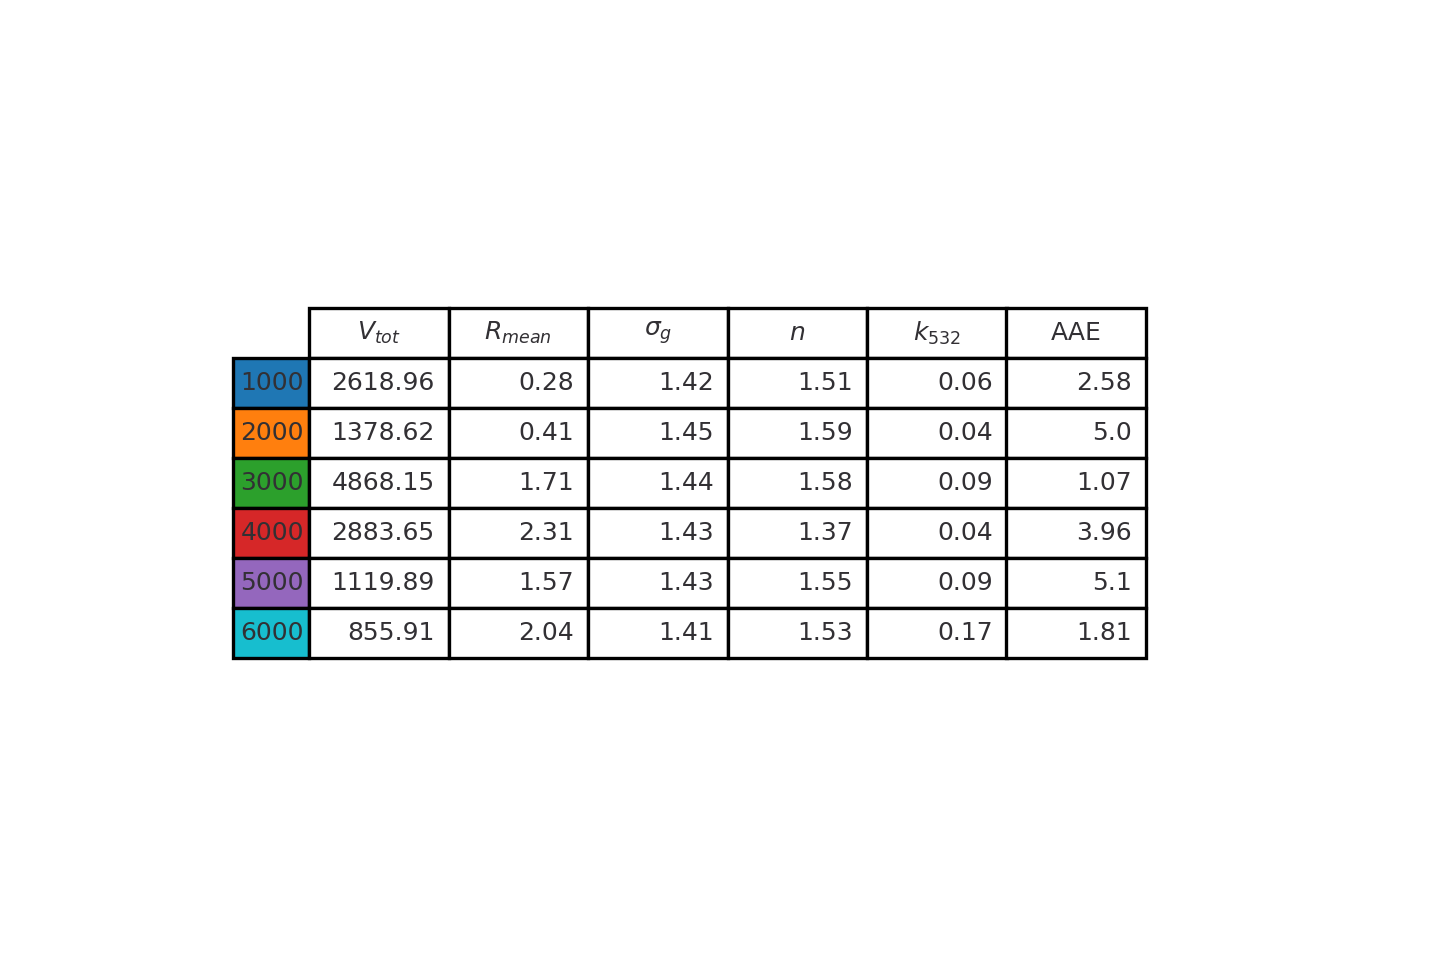

In [29]:

fig, ax =plt.subplots(1,1)



ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_new[dvar_columns].values,colLabels=df_new_columns,rowLabels=df_new_index,loc="center",rowColours =color1,colWidths=[0.1,0.1,0.1,0.1,0.1,0.1])

#plt.show()

IndexError: list index out of range

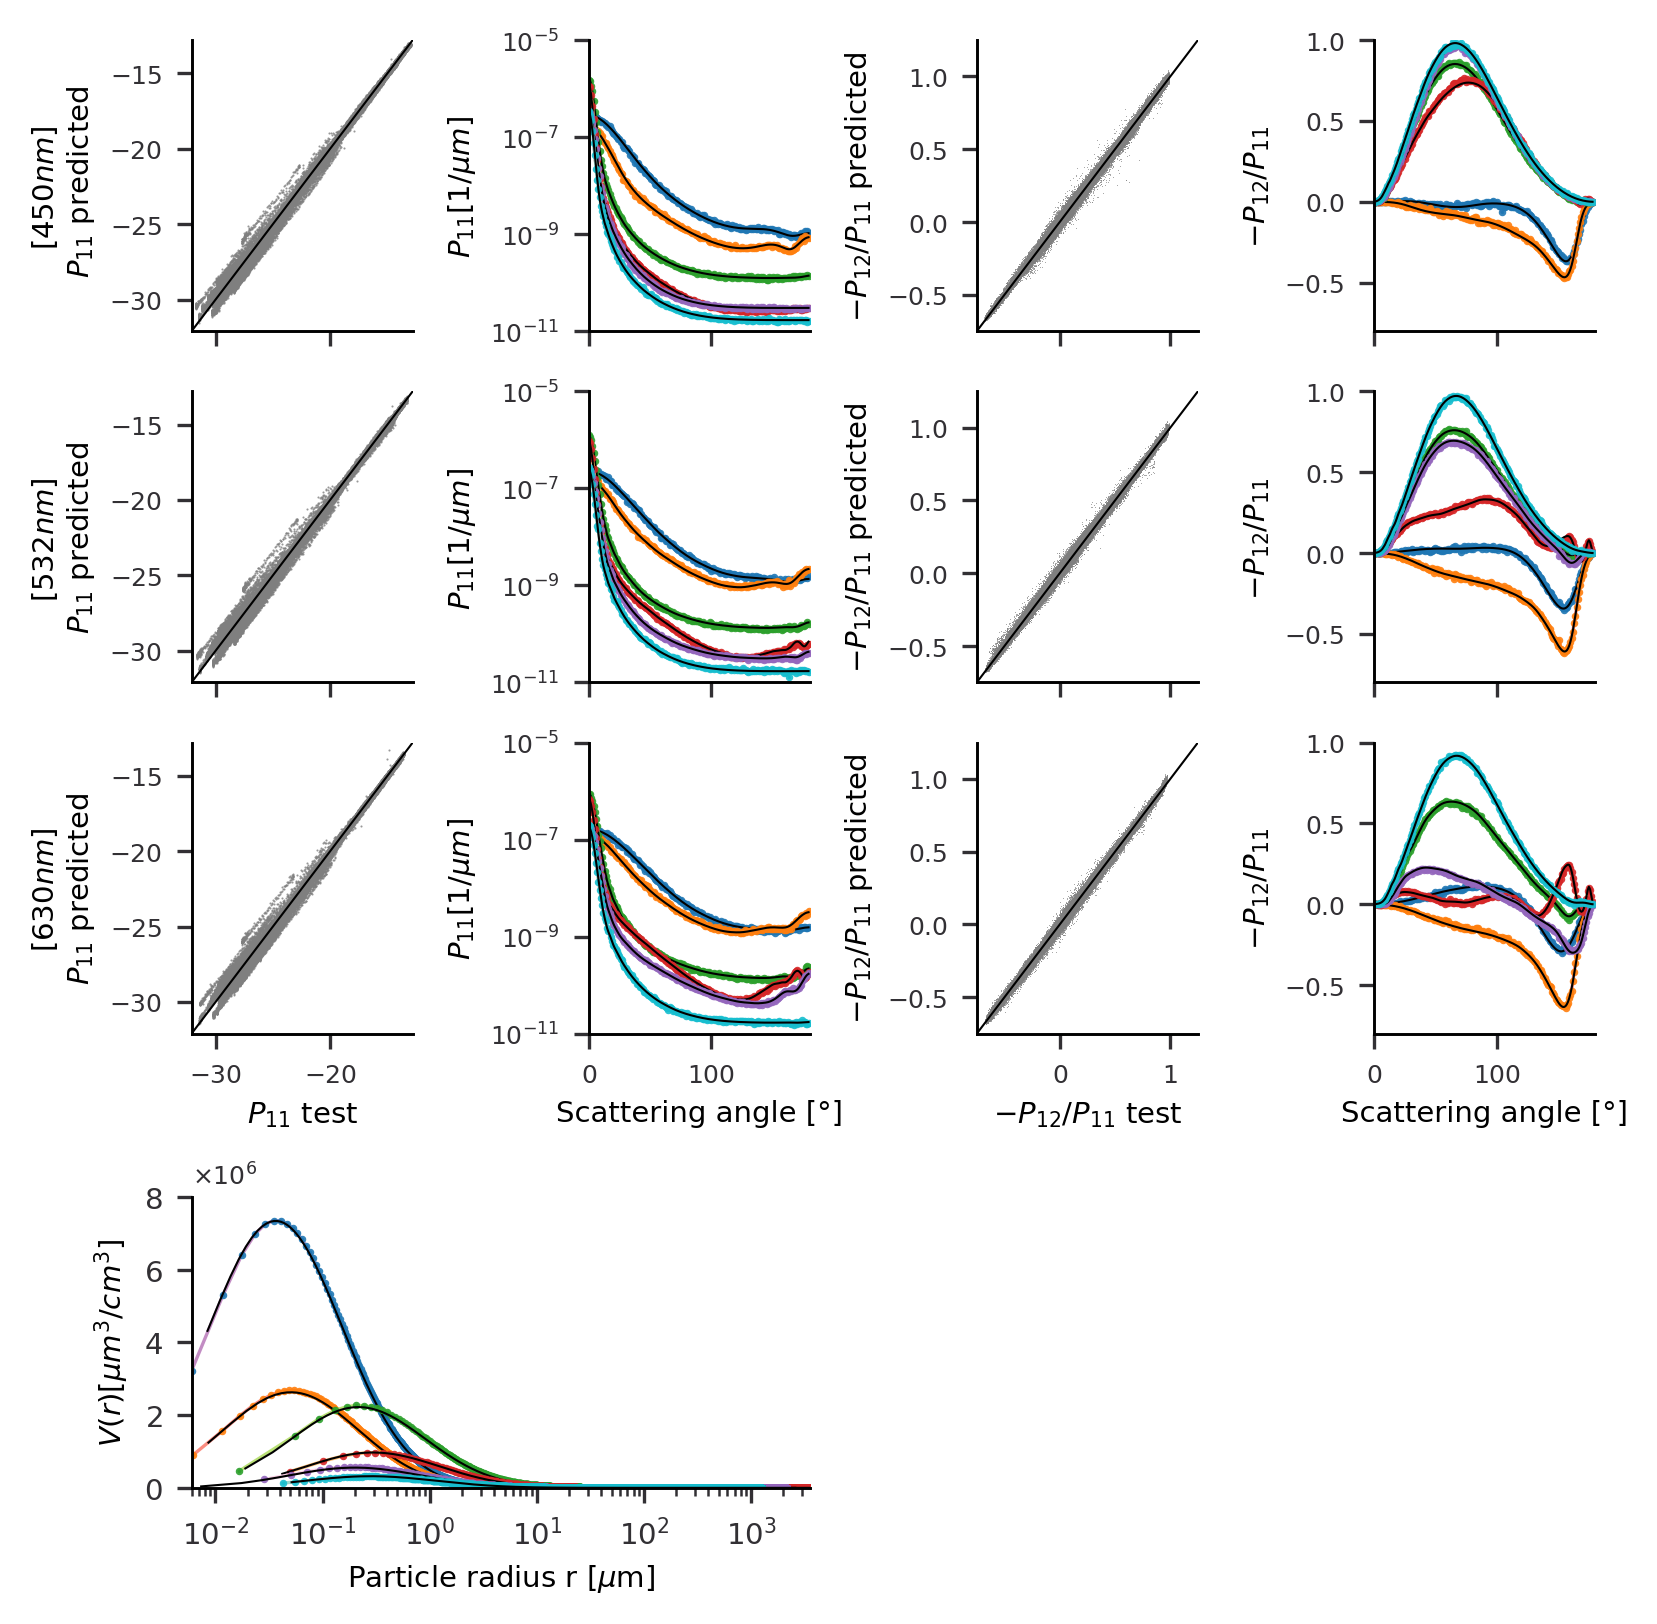

In [35]:
#fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(3, 3, figsize =(14,14))
#fig,ax = plt.subplots(3, 3, figsize =(14,14))

fig = plt.figure(figsize=(5.3,5.3),constrained_layout=True)


gs = GridSpec(4, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0],sharex=ax1)
ax6 = fig.add_subplot(gs[1, 1],sharex=ax2)
ax7 = fig.add_subplot(gs[1, 2],sharex=ax3)
ax8 = fig.add_subplot(gs[1, 3],sharex=ax4)
ax9 = fig.add_subplot(gs[2, 0],sharex=ax1)
ax10 = fig.add_subplot(gs[2, 1],sharex=ax2)
ax11 = fig.add_subplot(gs[2, 2],sharex=ax3)
ax12 = fig.add_subplot(gs[2, 3],sharex=ax4)
ax13 = fig.add_subplot(gs[3,0:2])
ax14 = fig.add_subplot(gs[3,2:4])
i = 0
for index in presentation_plot_index:
    
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_450])).iloc[index],**pred_marker532)
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_test[wl_P11_450])).iloc[index],**test_marker532)

    
    
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_532])).iloc[index],**pred_marker532)
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_test[wl_P11_532])).iloc[index],**test_marker532)

    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_630])).iloc[index],**pred_marker532)
    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_test[wl_P11_630])).iloc[index],**test_marker532)

    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_pred_fw[wl_P12_450])).iloc[index],**pred_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_test[wl_P12_450])).iloc[index],**test_marker532)
      
    
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_pred_fw[wl_P12_532])).iloc[index],**pred_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_test[wl_P12_532])).iloc[index],**test_marker532)

    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_pred_fw[wl_P12_630])).iloc[index],**pred_marker532)
    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_test[wl_P12_630])).iloc[index],**test_marker532)


    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax6.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax8.get_xticklabels(), visible=False)
    i = i+1

ax2.set_ylabel('$P_{11} [1 / \mu m]$')
ax2.set_yscale('log')
ax2.set_xlim(0, 180)
ax6.set_yscale('log')
ax6.set_ylabel('$P_{11} [1 / \mu m]$ ')
ax6.set_xlim(0, 180)
ax10.set_yscale('log')
ax10.set_xlabel('Scattering angle [°]')
ax10.set_ylabel('$P_{11} [1 / \mu m]$')
ax10.set_xlim(0, 180)
ax4.set_xlim(0, 180)
ax4.set_ylabel('$-P_{12}/P_{11}$')
ax8.set_ylabel('$-P_{12}/P_{11}$ ')
ax8.set_xlim(0, 180)
ax12.set_xlabel('Scattering angle [°]')
ax12.set_ylabel('$-P_{12}/P_{11}$')
ax12.set_xlim(0, 180)    


ax1.plot(qoi_test[wl_P11_450],qoi_pred_fw[wl_P11_450],'o', markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha  =0.8)

ax5.plot(qoi_test[wl_P11_532],qoi_pred_fw[wl_P11_532],'o',markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha = 0.8)
ax9.plot(qoi_test[wl_P11_630],qoi_pred_fw[wl_P11_630],'o',markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha = 0.8)

ax1.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax1.set_xlim(-32.1,-12.8)
ax1.set_ylim(-32.1,-12.8)
ax5.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax5.set_xlim(-32.1,-12.8)
ax5.set_ylim(-32.1,-12.8)
ax9.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax9.set_xlim(-32.1,-12.8)
ax9.set_ylim(-32.1,-12.8)

ax3.plot(qoi_test[wl_P12_450],qoi_pred_fw[wl_P12_450],".",markerfacecolor=colorg,markeredgecolor=None,markersize = 0.5,markeredgewidth=0,alpha = 0.8)
ax7.plot(qoi_test[wl_P12_532],qoi_pred_fw[wl_P12_532],".",markerfacecolor=colorg,markeredgecolor= None,markersize = 0.5,markeredgewidth=0,alpha = 0.8)
ax11.plot(qoi_test[wl_P12_630],qoi_pred_fw[wl_P12_630],".",markerfacecolor=colorg,markeredgecolor=None,markersize =0.5,markeredgewidth=0,alpha = 0.8)

ax3.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax3.set_xlim(-0.75,1.25)
ax3.set_ylim(-0.75,1.25)
ax7.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax7.set_xlim(-0.75,1.25)
ax7.set_ylim(-0.75,1.25)
ax11.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax11.set_xlim(-0.75,1.25)
ax11.set_ylim(-0.75,1.25)

ax1.set_ylabel('$[450 nm]$' ' \n' ' $P_{11}$ predicted')
ax3.set_ylabel('$-P_{12}/P_{11}$ predicted')
ax5.set_ylabel('$[532 nm]$' ' \n' '$P_{11}$ predicted')
ax7.set_ylabel('$-P_{12}/P_{11}$ predicted')

ax9.set_ylabel('$[630 nm]$' '\n' '$P_{11}$ predicted')
ax11.set_ylabel('$-P_{12}/P_{11}$ predicted')
ax9.set_xlabel('$P_{11}$ test')
ax11.set_xlabel('$-P_{12}/P_{11}$ test')


ax2.set_ylim(bottom = 10**(-11))
ax6.set_ylim(bottom = 10**(-11))
ax10.set_ylim(bottom = 10**(-11))

ax4.set_ylim(-0.8,1)
ax8.set_ylim(-0.8,1)
ax12.set_ylim(-0.8,1)



plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)


i=0
for datalen in (0,1,2,3,4,5):
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax13.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532)
    ax13.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532)

    i=i+1
    ax13.set_xscale('log')
    ax13.set_xlabel('Particle radius r [$\mu$m]',fontsize = 7)
    ax13.set_ylabel('$V(r) [\mu m^3/cm^3] $' ,fontsize = 7)
    ax13.tick_params(labelsize = 7)    
    #ax13.xaxis.set_minor_locator(AutoMinorLocator())
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    ax13.xaxis.set_minor_locator(x_minor)
    ax13.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ax13.set_ylim(bottom=0)
    ax13.set_xlim(left = np.min(x1data), right = np.max(x2data))
    
    
df_new = dvar_test.iloc[presentation_plot_index].round(2)
df_new_columns = ["$V_{tot}$","$R_{mean}$","$\sigma_g$","$n$","$k_{532}$","AAE"]
df_new_index = ['1000','2000','3000','4000','5000','6000']
ax14.axis('tight')
ax14.axis('off')
ax14.table(cellText=df_new.values,colLabels=df_new_columns,rowLabels=df_new_index,loc="center",rowColours =color1,fontsize=20)





#fig.tight_layout() 
fig.savefig(f'{plot_dir}/Test_Pred_V.jpg',bbox_inches='tight')






